In [240]:
!sim="ONT.R10.4"; IsoQuant/isoquant.py -t 32 -d nanopore --stranded forward --fastq Mouse.${sim}.simulated.shuffled.fastq \
 --reference lrgasp_grcm39_sirvs.fasta --genedb lrgasp_gencode_vM27_sirvs.gtf.gz --complete_genedb \
 --output IsoQuant_Mouse_IQ_${sim} --prefix IsoQuant_Mouse_IQ_${sim}

2024-02-26 23:06:49,763 - INFO - Running IsoQuant version 3.3.0
2024-02-26 23:06:49,764 - WARNING - Output folder already contains a previous run, some files may be overwritten. Use --resume to resume a failed run. Use --force to avoid this message. Press Ctrl+C to interrupt the run now.
2024-02-26 23:06:58,774 - INFO - Overwriting the previous run
2024-02-26 23:06:59,807 - WARNING - IsoQuant_Mouse_IQ_ONT.R10.4/IsoQuant_Mouse_IQ_ONT.R10.4 folder already exists, some files may be overwritten
2024-02-26 23:06:59,822 - WARNING - IsoQuant_Mouse_IQ_ONT.R10.4/IsoQuant_Mouse_IQ_ONT.R10.4/aux folder already exists, some files may be overwritten
2024-02-26 23:06:59,824 - INFO - Novel unspliced transcripts will not be reported, set --report_novel_unspliced true to discover them
2024-02-26 23:06:59,825 - INFO -  === IsoQuant pipeline started === 
2024-02-26 23:06:59,825 - INFO - Converting gene annotation file to .db format (takes a while)...
2024-02-26 23:11:36,327 - INFO - Gene database written

In [3]:
!sim="PB"; IsoQuant/isoquant.py -t 32 -d pacbio --stranded forward --fastq Mouse.${sim}.simulated.shuffled.fastq \
 --reference lrgasp_grcm39_sirvs.fasta --genedb lrgasp_gencode_vM27_sirvs.gtf --complete_genedb \
 --output IsoQuant_Mouse_IQ_${sim} --prefix IsoQuant_Mouse_IQ_${sim}

2024-05-08 12:58:53,394 - INFO - Running IsoQuant version 3.3.0
2024-05-08 12:58:53,395 - WARNING - Output folder already contains a previous run, some files may be overwritten. Use --resume to resume a failed run. Use --force to avoid this message. Press Ctrl+C to interrupt the run now.
2024-05-08 12:59:02,396 - INFO - Overwriting the previous run
2024-05-08 12:59:03,449 - WARNING - IsoQuant_Mouse_IQ_PB/IsoQuant_Mouse_IQ_PB folder already exists, some files may be overwritten
2024-05-08 12:59:03,449 - WARNING - IsoQuant_Mouse_IQ_PB/IsoQuant_Mouse_IQ_PB/aux folder already exists, some files may be overwritten
2024-05-08 12:59:03,484 - INFO -  === IsoQuant pipeline started === 
2024-05-08 12:59:03,497 - INFO - Converting gene annotation file to .db format (takes a while)...
2024-05-08 13:02:16,432 - INFO - Gene database written to /home/rebekah/IsoQuant_Mouse_IQ_PB/lrgasp_gencode_vM27_sirvs.db
2024-05-08 13:02:16,434 - INFO - Provide this database next time to avoid excessive conversion

In [ ]:
'''
#bambu Run 
library(bambu)

fa.file <- "/home/rebekah/lrgasp_grcm39_sirvs.fasta"

gtf.file <- "/home/rebekah/lrgasp_gencode_vM27_sirvs.gtf"

bambuAnnotations <- prepareAnnotations(gtf.file)

se <- bambu(reads = path_to_bam_generated_by_IsoQuant, annotations = bambuAnnotations, genome = fa.file, discovery = FALSE)
writeBambuOutput(se, path = "output_path")
'''

In [ ]:
'''
#Oarfish run
import os

def run(cdna_ref, bs, fastq):
    os.system("./LRGASP_data/minimap2-2.28_x64-linux/minimap2 -t 32 -ax map-ont -N 100 "+cdna_ref+" "+fastq+" > "+bs+".sam")
    os.system("samtools view -bS -o "+bs+".bam "+bs+".sam")
    os.system("oarfish --alignments "+bs+".bam --threads 32 --output "+bs+"_oarfish --model-coverage --filter-group no-filters")

run("ref/LRGASP.cdna.fa", "${sim}_Oarfish", "Mouse.${sim}.simulated.shuffled.fastq")
'''

In [22]:
#${kallisto} index -i LRGASP.k-${k}.v-13.idx -k ${k} LRGASP.cdna.fasta
 #'PB' #'ONT.R10.4'
#--long --error-rate $er --threshold 0.8
!kallisto='/home/rebekah/kallisto_synced/kallisto/build/src/kallisto';\
 bustools='bustools/build/src/bustools';\
 k=63;\
 sim='PB';\
 er=0.005;\
 ${kallisto} bus -t 30 -x bulk --long --error-rate $er --threshold 0.8 \
 -i LRGASP.k-${k}.v-13.idx Mouse.${sim}.simulated.shuffled.fastq \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er; \
 ${bustools} sort -t 30 Mouse.${sim}.simulated.shuffled._k-${k}_er/output_clean.bus \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er/sorted.bus; \
 ${bustools} count -t 30 Mouse.${sim}.simulated.shuffled._k-${k}_er/sorted.bus \
 -t Mouse.${sim}.simulated.shuffled._k-${k}_er/transcripts.txt \
 -e Mouse.${sim}.simulated.shuffled._k-${k}_er/matrix.ec \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er/count --cm -m \
 -g LRGASP.t2g; \
 ${kallisto} quant-tcc -t 30\
 Mouse.${sim}.simulated.shuffled._k-${k}_er/count.mtx \
 -i LRGASP.k-${k}.v-13.idx \
 -f Mouse.${sim}.simulated.shuffled._k-${k}_er/flens.txt \
 -e Mouse.${sim}.simulated.shuffled._k-${k}_er/count.ec.txt \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er/lr_quant_tcc; \
 ${kallisto} quant-tcc -t 30 \
 Mouse.${sim}.simulated.shuffled._k-${k}_er/count.mtx \
 -i LRGASP.k-${k}.v-13.idx \
 -e Mouse.${sim}.simulated.shuffled._k-${k}_er/count.ec.txt \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er


[index] k-mer length: 63
[index] number of targets: 142,551
[index] number of k-mers: 123,886,385
Suggested threshold for novel reads to 0.37
Using supplied threshold 0.8
Suggested kmer length for error rate is: 99
[quant] running in long read mode
[quant] will process file 1: Mouse.PB.simulated.shuffled.fastq
[progress] 5M reads processed (93.4% mapped)              done
[quant] processed 6,001,379 reads, 5,605,721 reads pseudoaligned

Read in 5605721 BUS records
Read in 5605721 text records
partition time: 0.2s
 all fits in buffer
Read in 5605721 BUS records
reading time 0.14s
sorting time 1.62s
writing time 0.03s

[index] k-mer length: 63
[index] number of targets: 142,551
[index] number of k-mers: 123,886,385
[index] number of equivalence classes loaded from file: 48,477
[tcc] Parsing transcript-compatibility counts (TCC) file as a matrix file
[tcc] Matrix dimensions: 1 x 48,477
[quant] Running EM algorithm...[quant] Processing sample/cell 0
[   em] number of priors does not match

In [23]:
from scipy.io import mmread
import pandas as pd
import numpy as np

def LRGASP_comp(sim_name, k):
    count = mmread('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/matrix.abundance.mtx')
    labels = pd.read_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/transcripts.txt', header=None, sep='\t')
    count_bus = pd.DataFrame(count.todense().T, columns=['bus_counts'])
    count_bus['transcript_id'] = [labels.values[i][0] for i in range(np.shape(labels.values)[0])]
    count_bus.index.name = 'transcript_id'
    count_bus.to_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er_bus_quant_tcc.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)

    count = mmread('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/lr_quant_tcc/matrix.abundance.mtx')
    labels = pd.read_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/transcripts.txt', header=None, sep='\t')

    count_bus = pd.DataFrame(count.todense().T, columns=['bus_counts'])
    count_bus['transcript_id'] = [labels.values[i][0] for i in range(np.shape(labels.values)[0])]

    count_bus.index.name = 'transcript_id'
    count_bus.to_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er_bus_lr_quant_tcc.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)
    

def LRGASP_comp_ONT(sim_name, k):
    count = mmread('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/matrix.abundance.mtx')
    labels = pd.read_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/transcripts.txt', header=None, sep='\t')

    count_bus = pd.DataFrame(count.todense().T, columns=['bus_counts'])
    count_bus['transcript_id'] = [labels.values[i][0] for i in range(np.shape(labels.values)[0])]
    count_bus.index.name = 'transcript_id'
    count_bus.to_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er_bus_quant_tcc.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)

    count = mmread('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/lr_quant_tcc/matrix.abundance.mtx')
    labels = pd.read_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/transcripts.txt', header=None, sep='\t')

    count_bus = pd.DataFrame(count.todense().T, columns=['bus_counts'])
    count_bus['transcript_id'] = [labels.values[i][0] for i in range(np.shape(labels.values)[0])]

    count_bus.index.name = 'transcript_id'
    count_bus.to_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er_bus_lr_quant_tcc.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)
    
LRGASP_comp("PB",str(63))
LRGASP_comp_ONT("ONT.R10.4",str(63))



  (0, 2)	6.0
  (0, 13)	2.0
  (0, 17)	2.0
  (0, 20)	2.0
  (0, 24)	25.0
  (0, 25)	2.0
  (0, 29)	28.0
  (0, 46)	4.0
  (0, 48)	10.0
  (0, 49)	215.0
  (0, 52)	194.0
  (0, 59)	2.0
  (0, 61)	183.234
  (0, 62)	326.766
  (0, 64)	4.0
  (0, 65)	77.0
  (0, 66)	53.0
  (0, 76)	323.885
  (0, 78)	1.0
  (0, 79)	823.115
  (0, 80)	13.0
  (0, 83)	1.0
  (0, 85)	388.0
  (0, 90)	35.0
  (0, 92)	35.0
  :	:
  (0, 140061)	11.0
  (0, 140065)	4.0
  (0, 140070)	75.9755
  (0, 140071)	96.0245
  (0, 140074)	2.0
  (0, 140076)	59.0
  (0, 140078)	1.5
  (0, 140079)	1.0
  (0, 140080)	4.0
  (0, 140081)	3.0
  (0, 140082)	7.5
  (0, 140097)	2.0
  (0, 140118)	7.0
  (0, 140272)	1.0
  (0, 140303)	3.5
  (0, 140316)	3.5
  (0, 140403)	2.0
  (0, 140518)	1.0
  (0, 141098)	1.0
  (0, 142366)	562.524
  (0, 142367)	134.074
  (0, 142368)	82.0
  (0, 142369)	2.02511
  (0, 142371)	425.0
  (0, 142372)	60.3767
(142551, 1)
[[0. 0. 6. ... 0. 0. 0.]]
  (0, 2)	6.0
  (0, 13)	2.0
  (0, 17)	2.0
  (0, 20)	2.0
  (0, 24)	25.0
  (0, 25)	2.0
  (0, 29)	28.0

/tmp/ipykernel_277841/1431755038.py:46: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  count_iso = pd.read_csv(


count_iso:                 transcript_id  iso_count
0       ENSMUST00000000834.4       2.00
1      ENSMUST00000001166.14     112.00
2      ENSMUST00000001172.12     110.00
3       ENSMUST00000001339.6     117.00
4      ENSMUST00000001724.12     115.00
...                      ...        ...
34686   ENSMUST00000189201.2       8.00
34687   ENSMUST00000191652.2       9.00
34688   ENSMUST00000238471.2     124.00
34689   ENSMUST00000238676.2       2.00
34690   ENSMUST00000238758.2     510.83

[34691 rows x 2 columns]
   transcript_id  bus_counts
0        SIRV101         0.0
1        SIRV102         0.0
2        SIRV103         0.0
3        SIRV105         0.0
4        SIRV106         0.0
..           ...         ...
79     SIRV10002         0.0
80     SIRV10003         0.0
81     SIRV12001         0.0
82     SIRV12002         0.0
83     SIRV12003         0.0

[84 rows x 2 columns]
               transcript_id  est_count  bus_counts  iso_count  length  \
0       ENSMUST00000082908.3        0

/home/rebekah/miniconda3/envs/isoquant/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5218: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


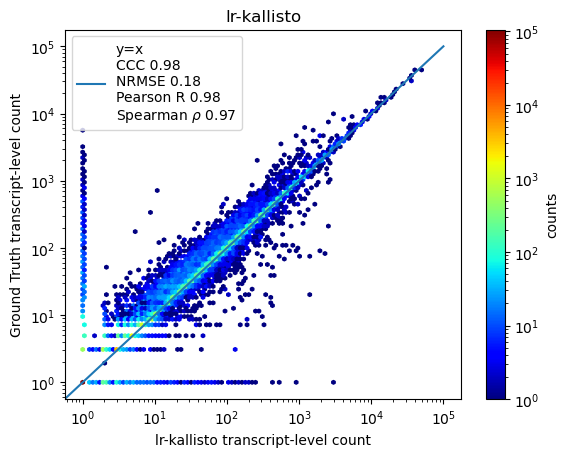

0.17655
PB_k-63
Pearson's r:	 0.9849979536828091
Spearman's rho:	 0.969528680814791
Kendall's tau:	 0.9570252760279169
0.47615
bambu  PB
Pearson's r:	 0.9293124180583677
Spearman's rho:	 0.9639659787757097
Kendall's tau:	 0.9469389580983577
CCC 0.9098195554249684
Pearson's r:	 0.9293440068950987
Spearman's rho:	 0.9639010507949687
Kendall's tau:	 0.9469040990487128


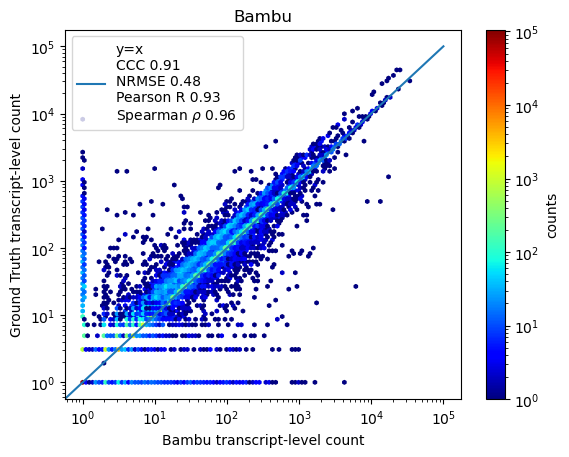

0.47586
bambu quantOnly  PB
Pearson's r:	 0.9293440068950987
Spearman's rho:	 0.9639010507949687
Kendall's tau:	 0.9469040990487128
CCC 0.7917702089067344
Pearson's r:	 0.8306903321592941
Spearman's rho:	 0.8854080598835804
Kendall's tau:	 0.8464869902101457


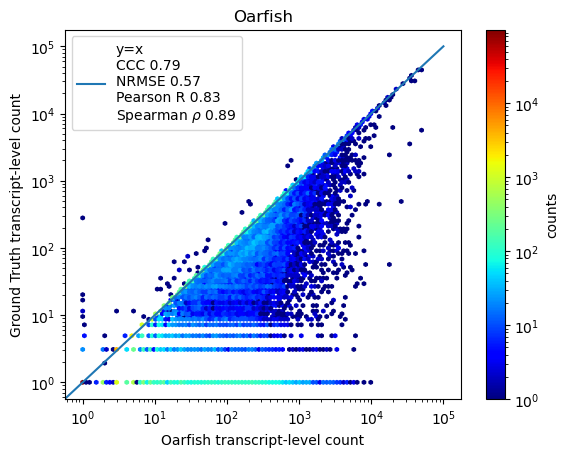

0.56836
oarfish: PB
Pearson's r:	 0.8306903321592941
Spearman's rho:	 0.8854080598835804
Kendall's tau:	 0.8464869902101457
CCC 0.9021870641822198
Pearson's r:	 0.9027770349864893
Spearman's rho:	 0.9773335333512994
Kendall's tau:	 0.9719302715307339


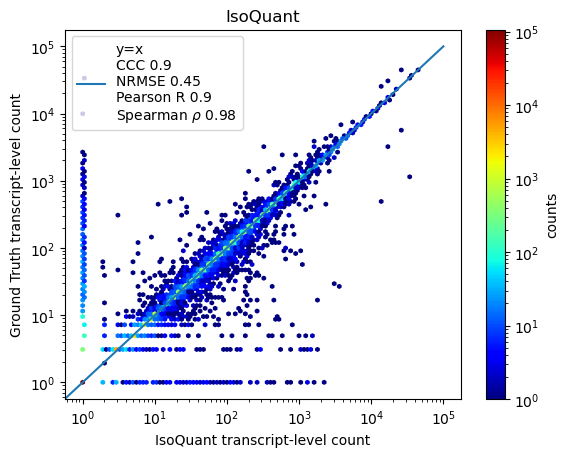

0.45051
IsoQuant: PB_k-63
Pearson's r:	 0.9027770349864893
Spearman's rho:	 0.9773335333512994
Kendall's tau:	 0.9719302715307339


/home/rebekah/miniconda3/envs/isoquant/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5218: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


CCC 0.9857451988728746
Pearson's r:	 0.9860435609058851
Spearman's rho:	 0.9723970261228969
Kendall's tau:	 0.9603033692609669


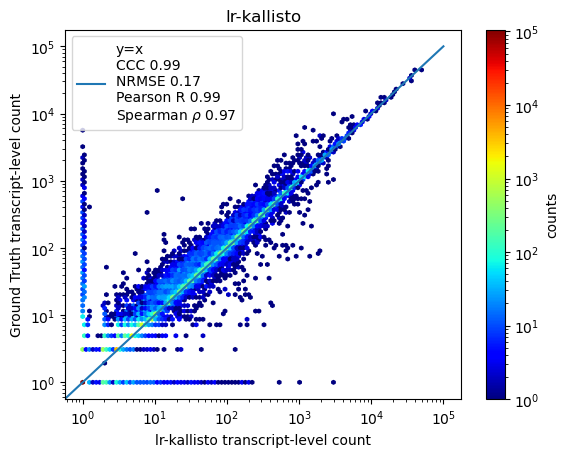

0.17087
PB_k-63 Length normalized
Pearson's r:	 0.9860435609058851
Spearman's rho:	 0.9723970261228969
Kendall's tau:	 0.9603033692609669


/tmp/ipykernel_277841/1431755038.py:458: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  count_iso = pd.read_csv(


count_iso:                 transcript_id  iso_count
0       ENSMUST00000000834.4       8.00
1      ENSMUST00000001166.14     560.33
2      ENSMUST00000001172.12     498.00
3       ENSMUST00000001339.6     620.50
4      ENSMUST00000001724.12     577.50
...                      ...        ...
39475   ENSMUST00000189201.2      62.00
39476   ENSMUST00000191652.2      63.00
39477   ENSMUST00000238471.2     730.00
39478   ENSMUST00000238676.2      10.00
39479   ENSMUST00000238758.2     696.25

[39480 rows x 2 columns]
count_iso:              transcript_id  iso_count
0      ENSMUST00000000834       8.00
1      ENSMUST00000001166     560.33
2      ENSMUST00000001172     498.00
3      ENSMUST00000001339     620.50
4      ENSMUST00000001724     577.50
...                   ...        ...
39475  ENSMUST00000189201      62.00
39476  ENSMUST00000191652      63.00
39477  ENSMUST00000238471     730.00
39478  ENSMUST00000238676      10.00
39479  ENSMUST00000238758     696.25

[39480 rows x 2 columns]


/home/rebekah/miniconda3/envs/isoquant/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5218: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


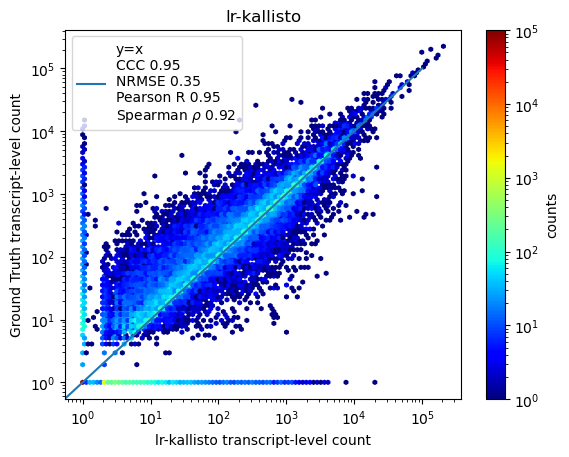

0.35255
ONT.R10.4_k-63
Pearson's r:	 0.9531444640307268
Spearman's rho:	 0.9190320411453832
Kendall's tau:	 0.8830964000213358
CCC 0.8822620799059765
Pearson's r:	 0.892524651790996
Spearman's rho:	 0.9044623045862304
Kendall's tau:	 0.8647841592999508


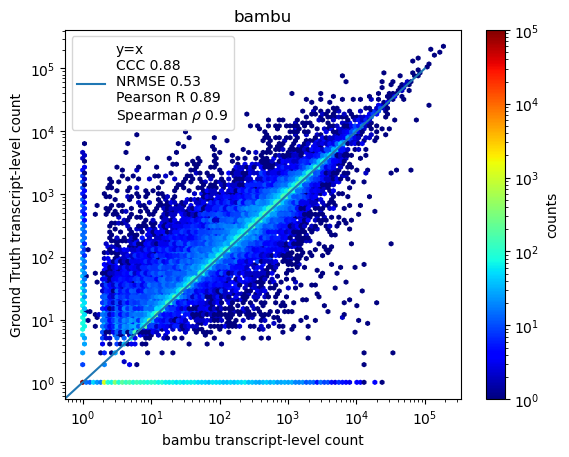

0.52659
bambu  ONT.R10.4
Pearson's r:	 0.892524651790996
Spearman's rho:	 0.9044623045862304
Kendall's tau:	 0.8647841592999508
2.24506
oarfish: ONT.R10.4
Pearson's r:	 0.9422495304157698
Spearman's rho:	 0.7957024980395309
Kendall's tau:	 0.7452212499018128
CCC 0.7181514385008749
Pearson's r:	 0.7788409050359653
Spearman's rho:	 0.6952994261682237
Kendall's tau:	 0.6195145140686231


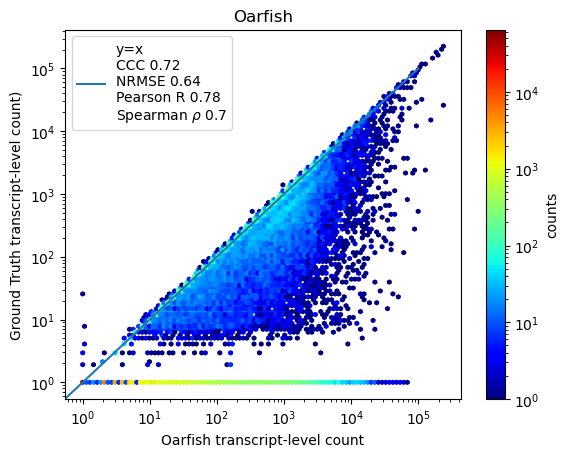

oarfish not -u f: ONT.R10.4
Pearson's r:	 0.7788409050359653
Spearman's rho:	 0.6952994261682237
Kendall's tau:	 0.6195145140686231
CCC 0.9091055536850428
Pearson's r:	 0.9127416946472109
Spearman's rho:	 0.8980256386580063
Kendall's tau:	 0.8686619591955687


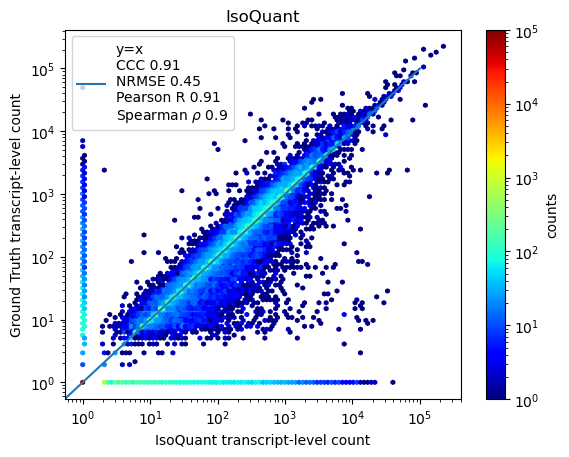

0.44673
IsoQuant: ONT.R10.4
Pearson's r:	 0.9127416946472109
Spearman's rho:	 0.8980256386580063
Kendall's tau:	 0.8686619591955687


/home/rebekah/miniconda3/envs/isoquant/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5218: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


CCC 0.9456022665632808
Pearson's r:	 0.9571257084766528
Spearman's rho:	 0.9144625088661109
Kendall's tau:	 0.880776893217307


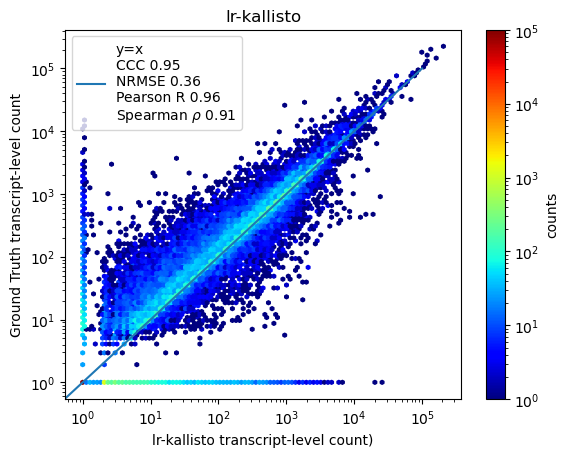

0.35863
ONT.R10.4_k-63 Length normalized
Pearson's r:	 0.9571257084766528
Spearman's rho:	 0.9144625088661109
Kendall's tau:	 0.880776893217307


In [198]:
import scipy
import pandas as pd
import numpy as np
from permetrics.regression import RegressionMetric
import matplotlib.pyplot as plt

def c_ccc(y_pred,y_true):
    cor = np.corrcoef(y_true, y_pred)[0][1]
    # Means
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    # Population variances
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    # Population standard deviations
    sd_true = np.std(y_true)
    sd_pred = np.std(y_pred)
    # Calculate CCC
    numerator = 2 * cor * sd_true * sd_pred
    denominator = var_true + var_pred + (mean_true - mean_pred)**2
    ccc = numerator / denominator
    return ccc

def pearson_corr(sim, k):
    count_bus = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled._k-" + k + "_er_bus_quant_tcc.tsv",
        header=0,
        sep="\t",
    )

    count_bus_sirv = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled._k-" + k + "_er_bus_lr_quant_tcc_sirv.tsv",
        header=0,
        sep="\t",
    )
    
    count_oar = pd.read_csv(
        "Mouse." + sim + ".oarfish.quant",
        header=0,
        sep="\t",
        names=['transcript_id', 'length', 'oar_count'],
    )
    count_bambu = pd.read_csv(
        "Mouse_"+sim+"/counts_transcript_ENSMUST.txt",
        header=0,
        sep="\t",
        names=['transcript_id', 'gene_id', 'bambu_count'],
    )
    count_bambu_qO = pd.read_csv(
        "Mouse_"+sim+"_quantOnly/counts_transcript.txt",
        header=0,
        sep="\t",
        names=['transcript_id', 'gene_id', 'bambu_count_qO'],
    )
    count_sim = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled.csv",
        header=0,
        sep="\t",
        names=["transcript_id", "est_count"],
    )
    # IsoQuant_Mouse_IQ_${sim}
    count_iso = pd.read_csv(
        "IsoQuant_Mouse_IQ_"
        + sim
        + "/IsoQuant_Mouse_IQ_"
        + sim
        + "/IsoQuant_Mouse_IQ_"
        + sim
        + ".transcript_counts.tsv",
        header=0, skipfooter=3,
        sep="\t",
        names=["transcript_id", "iso_count"],
    )
    print("count_iso: ", count_iso)
    print(count_bus_sirv)
    
    count = count_sim.merge(count_bus, how="outer", on="transcript_id")
    count = count.merge(count_iso, how="outer", on="transcript_id")
    count = count.merge(count_oar, how="outer", on="transcript_id")
    count = count.merge(count_bambu, how="outer", on="transcript_id")
    count = count.merge(count_bambu_qO, how="outer", on="transcript_id")
    count = count.fillna(0)
    print(count)

    x = count["bus_counts"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    #print(sim+'_k-'+k)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 

    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("lr-kallisto transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")  
    plt.title("lr-kallisto")
    plt.legend()
    plt.savefig(sim+'kallisto_lr_tlc_hex.png', dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    # y, x = y/np.sum(y)*10000000 + 1,x/np.sum(x)*10000000 + 1
    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print(sim + "_k-" + k)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["bambu_count"]+1
    y = count["est_count"]+1
    
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    # y, x = y/np.sum(y)*10000000 + 1,x/np.sum(x)*10000000 + 1
    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("bambu ", sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["bambu_count_qO"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 
    
    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("Bambu transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("Bambu")
    plt.legend()
    plt.savefig(sim+'bambu_tlc_hex.png', dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("bambu quantOnly ", sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["oar_count"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 
 

    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("Oarfish transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("Oarfish")
    plt.legend()
    plt.savefig(sim+'oarfish_tlc_hex.png', dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("oarfish: "+sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    
    x = count["iso_count"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 

    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("IsoQuant transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("IsoQuant")
    plt.legend()
    plt.savefig(sim+'isoquant_tlc_hex.png', dpi=300)
    plt.show()
    
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("IsoQuant: " + sim + "_k-" + k)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    count_bus_lr = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled._k-" + k + "_er_bus_lr_quant_tcc.tsv",
        header=0,
        sep="\t",
    )

    count = count_sim.merge(count_bus_lr, how="outer", on="transcript_id")
    count = count.fillna(0)

    x = count["bus_counts"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 
    
    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("lr-kallisto transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("lr-kallisto")
    plt.legend()
    plt.savefig(sim+'klr_tlc_ln_hex.png', dpi=300)
    plt.show()


def pearson_corr_ONT(sim, k):
    count_bus = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled._k-" + k + "_er_bus_quant_tcc.tsv",
        header=0,
        sep="\t",
    )
    count_bambu = pd.read_csv(
        "Mouse_"+sim+"/counts_transcript.txt",
        header=0,
        sep="\t",
        names=['transcript_id', 'gene_id', 'bambu_count'],
    )
    count_oar = pd.read_csv(
        "Mouse." + sim + ".oarfish.quant",
        header=0,
        sep="\t",
        names=['transcript_id', 'length', 'oar_count'],
    )

    count_oar_nuf = pd.read_csv(
        "Mouse." + sim + ".notuf.oarfish.quant",
        header=0,
        sep="\t",
        names=['transcript_id', 'length', 'oar_count_nuf'],
    )
    
    count_sim = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled.tsv",
        header=0,
        sep="\t",
        names=["transcript_id", "est_count"],
    )
    # IsoQuant_Mouse_IQ_${sim}
    count_iso = pd.read_csv(
        "IsoQuant_Mouse_IQ_"
        + sim
        + "/IsoQuant_Mouse_IQ_"
        + sim
        + "/IsoQuant_Mouse_IQ_"
        + sim
        + ".transcript_counts.tsv",
        header=0, skipfooter=3,
        sep="\t",
        names=["transcript_id", "iso_count"],
    )
    print("count_iso: ", count_iso)

    labels = pd.read_csv('Mouse.'+sim+'.simulated.shuffled._k-'+k+'_er/transcripts.txt', header=None, sep='\t')

    count_bus['transcript_id'] = [labels.values[i][0].split('.')[0] for i in range(np.shape(labels.values)[0])]
    count_iso['transcript_id'] = [count_iso['transcript_id'].values[i].split('.')[0] for i in range(np.shape(count_iso['transcript_id'].values)[0])]
    count_oar['transcript_id'] = [count_oar['transcript_id'].values[i].split('.')[0] for i in range(np.shape(count_oar['transcript_id'].values)[0])]
    count_bambu['transcript_id'] = [count_bambu['transcript_id'].values[i].split('.')[0] for i in range(np.shape(count_bambu['transcript_id'].values)[0])]
    count_oar_nuf['transcript_id'] = [count_oar_nuf['transcript_id'].values[i].split('.')[0] for i in range(np.shape(count_oar_nuf['transcript_id'].values)[0])]
    
    
    print("count_iso: ", count_iso)
    count = count_bus.merge(count_iso, how="outer", on="transcript_id")
    print(count)
    count = count.merge(count_sim, how="outer", on="transcript_id")
    count = count.fillna(0)
    print(count)

    count = count.merge(count_bambu, how="outer", on="transcript_id")
    count = count.fillna(0)
    print(count)
    
    count = count.merge(count_oar, how="outer", on="transcript_id")
    count = count.fillna(0)
    print(count)

    count = count.merge(count_oar_nuf, how="outer", on="transcript_id")
    count = count.fillna(0)
    print(count)

    x = count["bus_counts"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 


    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("lr-kallisto transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("lr-kallisto")
    plt.legend()
    plt.savefig(sim+'klr_tlc_hex.png', dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print(sim + "_k-" + k)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["bambu_count"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 
    
    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("bambu transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("bambu")
    plt.legend()
    plt.savefig(sim+'bambu_tlc_hex.png', dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("bambu ", sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["oar_count"]+1
    y = count["est_count"]+1

    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())
    # y, x = y/np.sum(y)*10000000 + 1,x/np.sum(x)*10000000 + 1

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("oarfish: "+sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["oar_count_nuf"]+1
    y = count["est_count"]+1

    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 


    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("Oarfish transcript-level count")
    plt.ylabel("Ground Truth transcript-level count)")
    plt.title("Oarfish")
    plt.legend()
    plt.savefig(sim+'oarfish_tlc_hex.png', dpi=300)
    plt.show()

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("oarfish not -u f: "+sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    
    x = count["iso_count"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 

    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("IsoQuant transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("IsoQuant")
    plt.legend()
    plt.savefig(sim+'isoquant_tlc_hex.png', dpi=300)
    plt.show()
    
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("IsoQuant: " + sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    count_bus_lr = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled._k-" + k + "_er_bus_lr_quant_tcc.tsv",
        header=0,
        sep="\t",
    )
    # count_sim = pd.read_csv("LRGASP.transcript.expression", header=0, sep='\t')
    count_bus_lr['transcript_id'] = [labels.values[i][0].split('.')[0] for i in range(np.shape(labels.values)[0])]
    count = count_sim.merge(count_bus_lr, how="outer", on="transcript_id")
    count = count.fillna(0)

    x = count["bus_counts"]+1
    y = count["est_count"]+1

    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    #print(sim+'_k-'+k)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 

    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("lr-kallisto transcript-level count)")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("lr-kallisto")
    plt.legend()
    plt.savefig(sim+'klr_tlc_ln_hex.png', dpi=300)
    plt.show()

    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print(sim + "_k-" + k + " Length normalized")
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)


#pearson_corr("PB", str(47))
pearson_corr("PB", str(63))
pearson_corr_ONT("ONT.R10.4", str(63))
#pearson_corr_ONT("ONT.R10.4", str(31))
# pearson_corr_ONT("ONT.R10.4", str(41))
#pearson_corr_ONT("ONT.R10.4", str(31))

